In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
merged_data = pd.read_csv('../data/processed/merged_data.csv')

# Display summary statistics and info
print(merged_data.describe(include='all'))
print(merged_data.info())


       Province_x Month-Year  Unemployment Rate Minimum Wage
count        6391       6391        6391.000000         6086
unique         11        581                NaN          174
top        Canada   Jan-1976                NaN        $4.00
freq          581         11                NaN          395
mean          NaN        NaN           9.095634          NaN
std           NaN        NaN           3.503424          NaN
min           NaN        NaN           3.200000          NaN
25%           NaN        NaN           6.500000          NaN
50%           NaN        NaN           8.400000          NaN
75%           NaN        NaN          11.200000          NaN
max           NaN        NaN          22.700000          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Province_x         6391 non-null   object 
 1   Month-Year   

In [3]:

# Ensure the datatype is correct
merged_data['Minimum Wage'] = merged_data['Minimum Wage'].replace('[\$,]', '', regex=True).astype(float)
merged_data['Unemployment Rate'] = merged_data['Unemployment Rate'].astype(float)

# Clean the dataset by removing rows with NaN values in 'Minimum Wage'
cleaned_data = merged_data.dropna(subset=['Minimum Wage'])

# Drop existing 'Canada' values
cleaned_data = cleaned_data[cleaned_data['Province_x'] != 'Canada']

# Calculate the average unemployment rate and minimum wage for each month-year across all provinces
canada_averages = cleaned_data.groupby('Month-Year').agg({
    'Unemployment Rate': 'mean',
    'Minimum Wage': 'mean'
}).reset_index()

canada_averages

,Month-Year,Unemployment Rate,Minimum Wage
0,Apr-1976,7.47,2.620
1,Apr-1977,8.74,2.815
2,Apr-1978,9.36,2.877
3,Apr-1979,9.08,2.947
4,Apr-1980,8.20,3.040
...,...,...,...
576,Sep-2019,6.81,12.446
577,Sep-2020,9.63,12.842
578,Sep-2021,8.24,13.150
579,Sep-2022,6.02,13.666


In [4]:

# Add 'Canada' as a geography
canada_averages['Province_x'] = 'Canada'

# Perform regression analysis on the new 'Canada' dataset
X_canada_avg = canada_averages['Minimum Wage']
y_canada_avg = canada_averages['Unemployment Rate']

X_canada_avg = sm.add_constant(X_canada_avg)

# Fit the linear regression model for the new 'Canada' dataset
model_canada_avg = sm.OLS(y_canada_avg, X_canada_avg).fit()

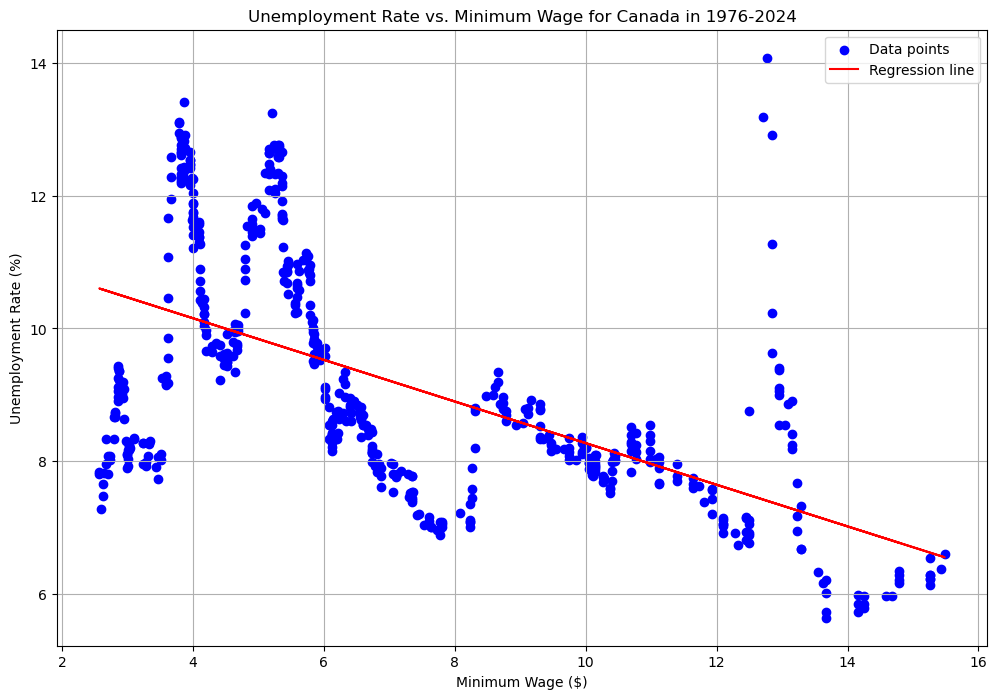

In [5]:
# Plot the regression for the new 'Canada' dataset
plt.figure(figsize=(12, 8))
plt.scatter(X_canada_avg['Minimum Wage'], y_canada_avg, color='blue', label='Data points')
plt.plot(X_canada_avg['Minimum Wage'], model_canada_avg.predict(X_canada_avg), color='red', label='Regression line')
plt.xlabel('Minimum Wage ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Minimum Wage for Canada in 1976-2024')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Print the summary for the new 'Canada' dataset
summary_canada_avg = model_canada_avg.summary().as_text()

print('Regression summary for averaged Canada:')
print(summary_canada_avg)


Regression summary for averaged Canada:
                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     294.1
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.30e-53
Time:                        20:44:22   Log-Likelihood:                -1048.3
No. Observations:                 581   AIC:                             2101.
Df Residuals:                     579   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

Regression Analysis for Averaged Canada

### Analysis
1. **Coefficient of Minimum Wage:** The coefficient for the minimum wage is -0.3137, indicating a negative relationship between minimum wage and unemployment rate. This suggests that, on average, an increase in the minimum wage is associated with a decrease in the unemployment rate.

2. **R-squared:** The $R^{2}$ value is 0.337, meaning that approximately 33.7% of the variation in the unemployment rate can be explained by the minimum wage.

3. **P-value for Minimum Wage:** The p-value for the minimum wage coefficient is very low (0.000), indicating that the relationship is statistically significant.

### Plot Interpretation
The scatter plot with the regression line shows that as the minimum wage increases, the unemployment rate tends to decrease, reinforcing the negative correlation observed in the regression analysis.

### Conclusion
* The analysis indicates a statistically significant negative relationship between the minimum wage and the unemployment rate in Canada when averaged across all provinces. 
* This suggests that higher minimum wages may contribute to lower unemployment rates, possibly due to increased consumer spending and reduced employee turnover, among other factors. 
* This finding aligns with the trend observed in individual provinces and provides a broader perspective on the impact of minimum wage policies on unemployment rates in Canada.